# Proyecto Final - Luis Ricardo Barrios Chinchilla 19000945

## Importar bibliotecas

In [17]:
# Importar bibliotecas
import sys
import numpy as np
import seaborn as sns
import sklearn as sl
import matplotlib as mp
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Setear opciones de visualizacion
np.set_printoptions(threshold=sys.maxsize)
np.set_printoptions(suppress=True)
sns.set()

# !conda install --yes --prefix {sys.prefix} seaborn
# !conda install --yes --prefix {sys.prefix} scikit-learn

## Carga del dataset de entrenamiento y analisis exploratorio

In [18]:
# Cargar el dataset de entrenamiento
dataset = np.load('proyecto_training_data.npy') 

# Crear dos dataset, uno con 80% y otro con 20%
dataset_size = np.size(dataset, 0)
dataset80 = dataset[0:int(dataset_size*0.8)]
dataset20 = dataset[int(dataset_size*0.8):]

# Analisis exploratorio de datos
avg_variables = np.nanmean(dataset80, axis=0)
print('\nMedia: ', np.round(avg_variables, 4))

max_variables = np.nanmax(dataset80, axis=0)
print('Valor maximo: ', max_variables)

min_variables = np.nanmin(dataset80, axis=0)
print('Valor minimo: ', min_variables)

peak_to_peak = (np.nanmax(dataset80, axis=0) - np.nanmin(dataset80, axis=0))
print('Peak to Peak: ', peak_to_peak)

std_variables = np.nanstd(dataset80, axis=0)
print('Desv estandar: ', np.round(std_variables, 4))



Media:  [180590.2774      6.101    1156.3236      6.4854   1971.4512     69.947 ]
Valor maximo:  [755000.     10.   3228.     14.   2010.    313.]
Valor minimo:  [34900.     1.   334.     2.  1875.    21.]
Peak to Peak:  [720100.      9.   2894.     12.    135.    292.]
Desv estandar:  [78781.9511     1.3774   373.6203     1.6085    29.9389    23.466 ]


## Histograma de las variables

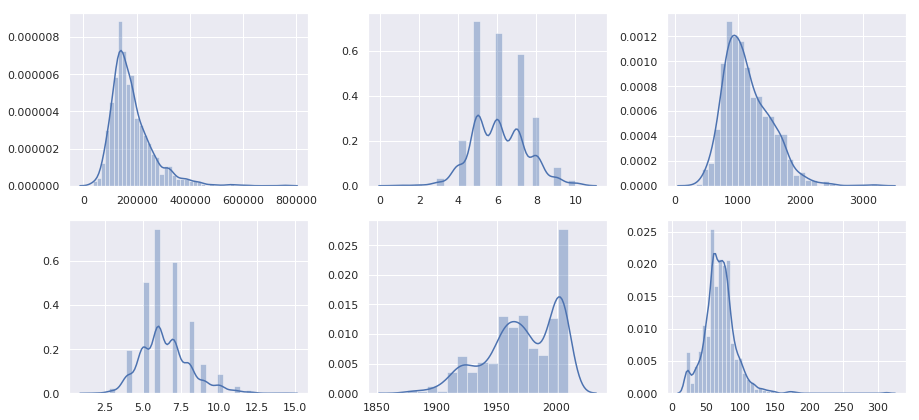

In [19]:
# Histograma de las variables
fig = plt.figure()
fig.set_size_inches(15, 7)
fig.subplots_adjust(hspace=0.2, wspace=0.25)

fig.add_subplot(2, 3, 1)
sns.distplot(dataset80[:,0])

fig.add_subplot(2, 3, 2)
his = sns.distplot(dataset80[:,1])

fig.add_subplot(2, 3, 3)
his = sns.distplot(dataset80[:,2])

fig.add_subplot(2, 3, 4)
his = sns.distplot(dataset80[:,3])

fig.add_subplot(2, 3, 5)
his = sns.distplot(dataset80[:,4])

fig.add_subplot(2, 3, 6)
his = sns.distplot(dataset80[:,5][~np.isnan(dataset80[:,5])])

## Calcular el coeficiente de correlacion

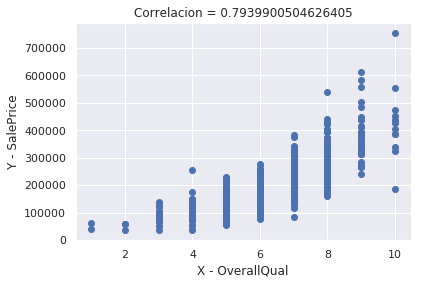

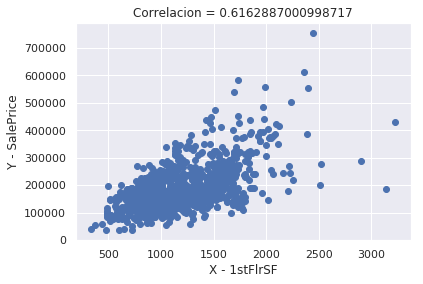

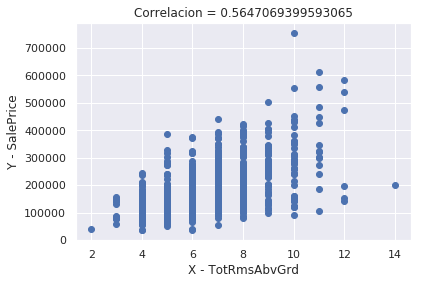

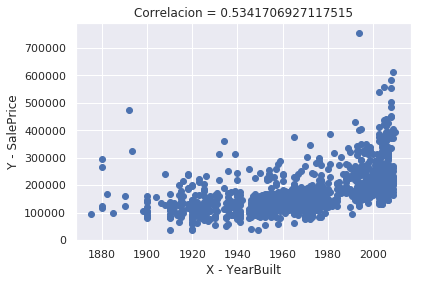

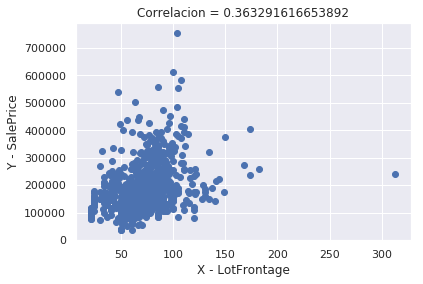

In [20]:
# Calcular el coeficiente de correlación de cada variable con respecto al precio de la casa
vector_SalePrice = dataset80[:,0]

corrcoef_OverallQual = np.corrcoef(dataset80[:,1], vector_SalePrice)
plt.title('Correlacion = ' + str(corrcoef_OverallQual[0,1]))
plt.xlabel('X - OverallQual')
plt.ylabel('Y - SalePrice')
plt.scatter(dataset80[:,1],vector_SalePrice)
plt.show()

corrcoef_1stFlrSF = np.corrcoef(dataset80[:,2], vector_SalePrice)
plt.title('Correlacion = ' + str(corrcoef_1stFlrSF[0,1]))
plt.xlabel('X - 1stFlrSF')
plt.ylabel('Y - SalePrice')
plt.scatter(dataset80[:,2], vector_SalePrice)
plt.show()

corrcoef_TotRmsAbvGrd = np.corrcoef(dataset80[:,3], vector_SalePrice)
plt.title('Correlacion = ' + str(corrcoef_TotRmsAbvGrd[0,1]))
plt.xlabel('X - TotRmsAbvGrd')
plt.ylabel('Y - SalePrice')
plt.scatter(dataset80[:,3], vector_SalePrice)
plt.show()

corrcoef_YearBuilt = np.corrcoef(dataset80[:,4], vector_SalePrice)
plt.title('Correlacion = ' + str(corrcoef_YearBuilt[0,1]))
plt.xlabel('X - YearBuilt')
plt.ylabel('Y - SalePrice')
plt.scatter(dataset80[:,4], vector_SalePrice)
plt.show()

corrcoef_LotFrontage = np.corrcoef(dataset80[:,5][~np.isnan(dataset80[:,5])], vector_SalePrice[~np.isnan(dataset80[:,5])])
plt.title('Correlacion = ' + str(corrcoef_LotFrontage[0,1]))
plt.xlabel('X - LotFrontage')
plt.ylabel('Y - SalePrice')
plt.scatter(dataset80[:,5][~np.isnan(dataset80[:,5])], vector_SalePrice[~np.isnan(dataset80[:,5])])
plt.show()

## Definicion de funciones

In [21]:
# Definicion de yhat
def yhat(observacion, parametros):
    return np.dot(observacion, parametros)

# Definicion de error
def error(y, yhat):
    return np.mean(np.power((y - yhat), 2))/2

# Definicion de gradiente
def gradiente(y, yhat, parametros, x):
    return np.mean(np.dot(np.transpose(yhat - y), x), axis=0)

# Funcion de entrenamiento manual
def entrenar_manual(x, y, epochs, imprimir_error_cada, lr, imprimir):
    # Declaracion de variables
    epoch = 0
    y = dataset80[:,0].reshape((-1,1))
    arr_errores = []
    arr_parametros = []
    
    # Valores iniciales de los parametros m y b
    parametros = np.array([[0.0],
                            [25000.0]])
    
    # Agregar vector de unos
    vector_unos = np.ones(np.size(dataset80, 0))
    x = np.column_stack((x, vector_unos))

    while epoch < epochs:
        # calcular yhat
        yhat_epoch = yhat(x, parametros)
        error_epoch = error(y, yhat_epoch)
        gradiente_epoch = gradiente(y, yhat_epoch, parametros, x)
        
        # agregar nuevo error
        arr_errores.append(error_epoch)
        
        # agregar nuevos parametros
        arr_parametros.append(list(parametros.flatten()))

        # Actualizar los parámetros del modelo
        parametros[0,0] -= lr * gradiente_epoch[0] # m
        parametros[1,0] -= lr * gradiente_epoch[1] # b
        
        if ((epoch % imprimir_error_cada == 0) and imprimir):
            print("Iteracion:", epoch, " - Parametros:", parametros[0,0], parametros[1,0], " - Error:", error_epoch)
        epoch+=1
    
    return np.asarray(arr_errores), np.asarray(arr_parametros)


# Funcion para graficar error, recibe dos parámetros, cada cuantas iteraciones y en que valor se detiene
def graficar_error(arr_errores, n, iteracion_stop, nombre_grafica):
    arr_posiciones = np.arange(np.size(arr_errores) + 1)
    plt.plot(arr_posiciones[:iteracion_stop:n], arr_errores[:iteracion_stop:n])
    plt.title('Grafica de error - ' + str(nombre_grafica))
    plt.xlabel('X - Iteracion')
    plt.ylabel('Y - Error')
    plt.show()
    
# Funcion para graficar la evolucion del modelo entrenado en el tiempo
def graficar_modelo(x, arr_parametros, n, nombre_grafica):
    # Crear un vector con una columna de unos
    x_unos = np.column_stack((x, np.ones(np.size(x, 0))))
    arr_parametros_filter = arr_parametros[::n]
    for i in range(0, np.size(arr_parametros_filter, 0)):
        plt.plot(x, x_unos.dot(arr_parametros_filter[i]))
    
    # Dibujar scatter plot real
    plt.scatter(x, vector_SalePrice)
    
    plt.title('Modelo entrenado en el tiempo para X = ' + str(nombre_grafica))
    plt.xlabel('X - ' + str(nombre_grafica))
    plt.ylabel('Y - Precio')
    plt.show()

## Evaluacion de las variables con mayor correlacion OverallQual y 1stFlrSF

Iteracion: 0  - Parametros: 51035.53566260001 32668.982536800002  - Error: 15207465118.29024
Iteracion: 2000  - Parametros: 45229.29838003629 -95299.51195982135  - Error: 1146949575.3652234
Iteracion: 4000  - Parametros: 45410.29145340308 -96458.63717470288  - Error: 1146916222.3712752
Iteracion: 6000  - Parametros: 45411.9828242885 -96469.46913973083  - Error: 1146916219.4586234
Iteracion: 8000  - Parametros: 45411.998630061724 -96469.57036388236  - Error: 1146916219.458369
Iteracion: 10000  - Parametros: 45411.998777765875 -96469.57130981682  - Error: 1146916219.458369

VALOR FINAL - OverallQual (m y b):  [ 45411.99877776 -96469.5713098 ]


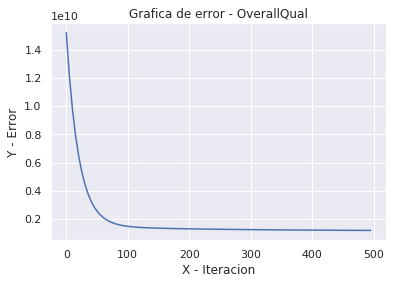

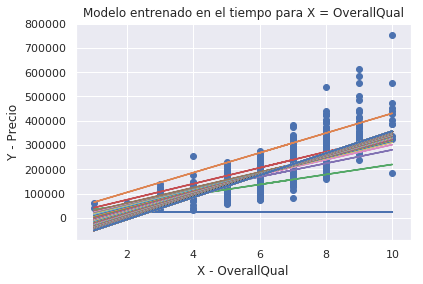

In [22]:
# entrenar(x, y, epochs, imprimir_error_cada, lr, imprimir)
arr_errores_OverallQual, arr_parametros_OverallQual = entrenar_manual(dataset80[:,1], 
                                                                      dataset80[:,0], 
                                                                      10001, 
                                                                      2000, 
                                                                      0.0000422, 
                                                                      True)
# Imprimir resultados del modelo para m y b
print('\nVALOR FINAL - OverallQual (m y b): ', arr_parametros_OverallQual[-1])

# Graficar el error cada 5 iteraciones hasta 500 valores
graficar_error(arr_errores_OverallQual, 5, 500, 'OverallQual')

# Graficar el modelo cada 25 iteraciones
graficar_modelo(dataset80[:,1], arr_parametros_OverallQual, 25, 'OverallQual')

Iteracion: 0  - Parametros: 268.2222339453945 25000.21071529032  - Error: 15207465118.29024
Iteracion: 50000  - Parametros: 134.20622161747173 25034.079811339496  - Error: 1925961100.1488414
Iteracion: 100000  - Parametros: 134.06767621449535 25067.83696238545  - Error: 1925934973.0335271
Iteracion: 150000  - Parametros: 134.04131719158426 25101.378805627348  - Error: 1925918358.343071
Iteracion: 200000  - Parametros: 134.01521948707082 25134.706627801133  - Error: 1925901955.0100038
Iteracion: 250000  - Parametros: 133.9892883826499 25167.821794442923  - Error: 1925885760.3392785

VALOR FINAL - 1stFlrSF (m y b):  [  133.9892889  25167.82113426]


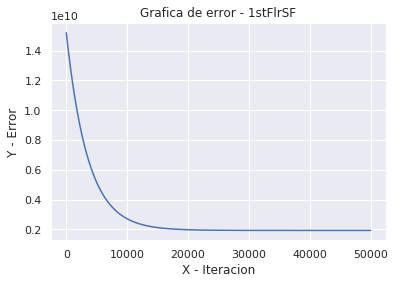

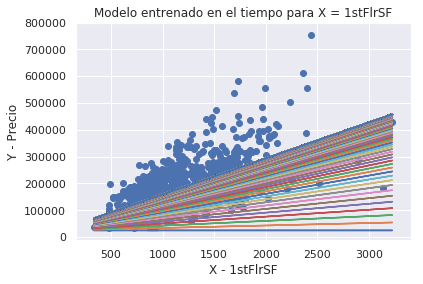

In [23]:
# entrenar(x, y, epochs, imprimir_error_cada, lr, imprimir)
arr_errores_1stFlrSF, arr_parametros_1stFlrSF = entrenar_manual(dataset80[:,2], 
                                                                dataset80[:,0], 
                                                                250001, 
                                                                50000, 
                                                                0.0000000011595, 
                                                                True)
# Imprimir resultados del modelo para m y b
print('\nVALOR FINAL - 1stFlrSF (m y b): ', arr_parametros_1stFlrSF[-1])

# Graficar el error cada 5 iteraciones hasta 50000 valores
graficar_error(arr_errores_1stFlrSF, 5, 50000, '1stFlrSF')

# Graficar el modelo cada 500 iteraciones
graficar_modelo(dataset80[:,2], arr_parametros_1stFlrSF, 500, '1stFlrSF')

## Entrenar con Scikit-learn

In [24]:
# Funcion Scikit-learn
def entrenar_scikit_learn(x_scikit, y_scikit):
    scikit_model = LinearRegression()
    scikit_model.fit(x_scikit, y_scikit)
    
    return np.append(scikit_model.coef_.flatten(), scikit_model.intercept_.flatten())

# Parametros que enviaremos a Scikit-learn
y_scikit_SalePrice = dataset80[:,0].reshape(-1, 1)

# Modelo para variable OverallQual
x_scikit_OverallQual = dataset80[:,1].reshape(-1, 1)
print('\nRESULTADO - scikit_OverallQual (m y b):', entrenar_scikit_learn(x_scikit_OverallQual, y_scikit_SalePrice))

# Modelo para variable 1stFlrSF
x_scikit_1stFlrSF = dataset80[:,2].reshape(-1, 1)
print('RESULTADO - scikit_1stFlrSF (m y b):', entrenar_scikit_learn(x_scikit_1stFlrSF, y_scikit_SalePrice))



RESULTADO - scikit_OverallQual (m y b): [ 45411.99877916 -96469.57131874]
RESULTADO - scikit_1stFlrSF (m y b): [  129.95124229 30324.58517496]


## Definir funcion para entrenar modelo con promedio de Manual y Scikit-learn

In [25]:
def entrenar_promedio_scikit_manual(x_entrenar_promedio, y_entrenar_promedio, x_adicional, fun_entrenar_manual, fun_entrenar_scikit_learn, iteraciones_manual, lr_manual):
    # Funcion manual
    arr_errores_promedio_manual, arr_parametros_promedio_manual = fun_entrenar_manual(x_entrenar_promedio, 
                                                                                      y_entrenar_promedio, 
                                                                                      iteraciones_manual, 
                                                                                      5000, lr_manual, False)
    # Funcion Scikit
    arr_parametros_promedio_scikit = fun_entrenar_scikit_learn(x_entrenar_promedio.reshape(-1, 1), 
                                                               y_entrenar_promedio.reshape(-1, 1))
    
    # Vector adicional - Agregar vector de unos
    x_adicional = np.column_stack((x_adicional, np.ones(np.size(x_adicional, 0))))

    # Prediccion con el modelo entrenado manualmente
    resultado_prediccion_manual = np.dot(x_adicional, arr_parametros_promedio_manual[-1])
    
    # Prediccion con el modelo entrenado por Scikit
    resultado_prediccion_scikit = np.dot(x_adicional, arr_parametros_promedio_scikit)
    
    # Promedio de predicciones
    resultado_promedio_prediccion = (resultado_prediccion_scikit + resultado_prediccion_manual)/2

    return resultado_prediccion_manual, resultado_prediccion_scikit, resultado_promedio_prediccion

### El resultado de la funcion descrita devuelve los tres vectores con prediccion manual, scikit y el promedio

## Valuar el 20% del dataset con las variables OverallQual y 1stFlrSF usando la funcion anterior

In [26]:
# Entrenar promedio para variable OverallQual (x, y, vector_adicional, funcion_manual, funcion scikit, iteraciones, lr)
# El vector de prueba es el 20% del dataset
arr_manual_OverallQ, arr_scikit_OverallQ, arr_promedio_OverallQ = entrenar_promedio_scikit_manual(dataset80[:,1],
                                                                                                  dataset80[:,0], 
                                                                                                  dataset20[:,1], 
                                                                                                  entrenar_manual, 
                                                                                                  entrenar_scikit_learn, 
                                                                                                  10001, 
                                                                                                  0.0000422)

# Entrenar promedio para variable 1stFlrSF (x, y, vector_adicional, funcion_manual, funcion scikit, iteraciones, lr)
# El vector de prueba es el 20% del dataset
arr_manual_1stFlrSF, arr_scikit_1stFlrSF, arr_promedio_1stFlrSF = entrenar_promedio_scikit_manual(dataset80[:,2], 
                                                                                                  dataset80[:,0], 
                                                                                                  dataset20[:,2], 
                                                                                                  entrenar_manual, 
                                                                                                  entrenar_scikit_learn, 
                                                                                                  250001, 
                                                                                                  0.0000000011595)

## Calcular el error de cada modelo utilizando el 20% del dataset

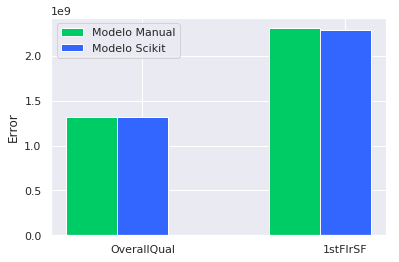

In [27]:
# Utilizamos la formula de error programada anteriormente
error_manual_OverallQ = error(dataset20[:,0], arr_manual_OverallQ)
error_scikit_OverallQ = error(dataset20[:,0], arr_scikit_OverallQ)

error_manual_1stFlrSF = error(dataset20[:,0], arr_manual_1stFlrSF)
error_scikit_1stFlrSF = error(dataset20[:,0], arr_scikit_1stFlrSF)

# Grafico de barras con los resultados
ancho_grafica = 0.25
 
barra1 = [error_manual_OverallQ, error_manual_1stFlrSF]
barra2 = [error_scikit_OverallQ, error_scikit_1stFlrSF]

r1 = np.arange(len(barra1))
r2 = [x + ancho_grafica for x in r1]
 
plt.bar(r1, barra1, color='#00cc66', width=ancho_grafica, edgecolor='white', label='Modelo Manual')
plt.bar(r2, barra2, color='#3366ff', width=ancho_grafica, edgecolor='white', label='Modelo Scikit')
 
plt.ylabel('Error')
plt.xticks([r + ancho_grafica for r in range(len(barra1))], ['OverallQual', '1stFlrSF'])
plt.legend()
plt.show()

## Conclusiones
Con base en el error, la correlacion y apoyados en la representación gráfica del mismo, podemos determinar que la mejor variable X que podemos utilizar es *OverallQual*

Con unos valores de **m = 45411.99877916 y b = -96469.57131874** nos otorga una funcion que devuelve una aproximacion bastante cercana a los valores reales.

En este proyecto pudimos apreciar la importancia del analisis exploratorio, la comprension de conceptos estadisticos y matematicos, tales como correlacion, producto punto, producto matricial, etc.